### <span style='color:blue '> Projet 5,  Segmentation des clients du site E-Commerce Olist</span>

### <span style='color:blue '>  Notebook de l'analyse exploratoire  </span>

In [1]:
#Librairies à importer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set()
import os
from math import radians, cos, sin, asin, sqrt
pd.set_option('display.max_columns', 50)

#### Chargement des datasets

Nous allons charger tous les datasets pour en visualiser les informations principales :

In [2]:
customers =  pd.read_csv("olist_customers_dataset.csv")

In [3]:
geolocalisation =  pd.read_csv("olist_geolocation_dataset.csv")

In [4]:
items =  pd.read_csv("olist_order_items_dataset.csv")

In [5]:
payments =  pd.read_csv("olist_order_payments_dataset.csv")

In [6]:
reviews =  pd.read_csv("olist_order_reviews_dataset.csv")

In [7]:
orders =  pd.read_csv("olist_orders_dataset.csv")

In [8]:
products =  pd.read_csv("olist_products_dataset.csv")

In [9]:
sellers =  pd.read_csv("olist_sellers_dataset.csv")

In [10]:
translation =  pd.read_csv("product_category_name_translation.csv")

#### <span style='color:blue'> Exploration initiale des données</span>

In [11]:
def shape(dataframe):
    "Calcule et affiche la forme de dataframe et le taux de remplissage"
    
    # Obtenir le nombre de lignes et de colonnes dans le dataframe
    nb_rows, nb_columns = dataframe.shape
    print("\nLe dataFrame a {} lignes et {} colonnes.".format(nb_rows,nb_columns))
    
    # Obtenir le nombre de données non-Nan dans le dataframe 
    nb_data = dataframe.describe(include='all').loc["count"].sum()

    # calcul du taux de remplissage en arrondissant à 2 décimales 
    import math
    filling_rate = math.floor(nb_data*10000 / (nb_rows * nb_columns))/10000
    print("Le taux de remplissage global du DataFrame est de : {:.2%}".format(filling_rate))
    
    # calcul des valeurs manquantes 
    nb_missing = int((nb_rows * nb_columns) - nb_data)
    print("Il y a {} valeurs manquantes sur {}.".format(nb_missing, int(nb_rows * nb_columns)))

In [12]:
shape(customers)
shape(geolocalisation)
shape(items)
shape(payments)
shape(reviews)
shape(orders)
shape(products)
shape(sellers)
shape(translation)


Le dataFrame a 99441 lignes et 5 colonnes.
Le taux de remplissage global du DataFrame est de : 100.00%
Il y a 0 valeurs manquantes sur 497205.

Le dataFrame a 1000163 lignes et 5 colonnes.
Le taux de remplissage global du DataFrame est de : 100.00%
Il y a 0 valeurs manquantes sur 5000815.

Le dataFrame a 112650 lignes et 7 colonnes.
Le taux de remplissage global du DataFrame est de : 100.00%
Il y a 0 valeurs manquantes sur 788550.

Le dataFrame a 103886 lignes et 5 colonnes.
Le taux de remplissage global du DataFrame est de : 100.00%
Il y a 0 valeurs manquantes sur 519430.

Le dataFrame a 100000 lignes et 7 colonnes.
Le taux de remplissage global du DataFrame est de : 79.06%
Il y a 146532 valeurs manquantes sur 700000.

Le dataFrame a 99441 lignes et 8 colonnes.
Le taux de remplissage global du DataFrame est de : -8.60%
Il y a 4908 valeurs manquantes sur 795528.

Le dataFrame a 32951 lignes et 9 colonnes.
Le taux de remplissage global du DataFrame est de : 99.17%
Il y a 2448 valeurs m

<ipython-input-11-dacc266cc477>:13: RuntimeWarning: overflow encountered in long_scalars
  filling_rate = math.floor(nb_data*10000 / (nb_rows * nb_columns))/10000



#### <span style='color:blue '>Description détaillée des bases de données</span>

#### <span style='color:green'> Les clients</span>

In [13]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Le dataset ne comporte pas de valeurs nulles.

- customer_id : Clé de l'ensemble de données des commandes. Chaque commande a un customer_id unique 
- customer_unique_id : Identifiant unique du client
- customer_zip_code_prefix: Les cinq premiers chiffres du code postal du client 
- customer_state : Etat du client

In [15]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [16]:
customers.duplicated(keep=False).sum()

0

In [17]:
# Nombre de clients
customers['customer_unique_id'].nunique()

96096

#### <span style='color:green'>Les données de géolocalisation</span>

In [18]:
geolocalisation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [19]:
geolocalisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


- geolocation_zip_code_prefix : Les 5 premiers chiffres du code postal 
- geolocation_lat : Latitude       
- geolocation_lng : Longitude

Le fichier compte plus d'un million de lignes et pas de valeurs nulles. Ce fichier est lié au fichier clients grâce à la clé geolocation_zip_code_prefix. Regardons la description du fichier pour avoir un aperçu des étendues de Latitudes et Longitudes :

In [20]:
geolocalisation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Les contenues de "customer_zip_code_prefix" et "geolocation_zip_code_prefix" sont identiques. Nous allons les renommer pour pouvoir merger les deux dataset.

In [21]:
customers.rename(columns = {"customer_zip_code_prefix":"zip_code_prefix"},inplace=True)
geolocalisation.rename(columns = {"geolocation_zip_code_prefix":"zip_code_prefix"},inplace=True)

#### Gestion des lignes dupliquées de "geolocalisation"

In [22]:
geolocalisation.duplicated(keep=False).sum() 

390005

In [23]:
#supprimer les doublons en geolocalisation (zip_code_prefix)

print("Number of rows before dropping duplicates in geolocalisation : ",geolocalisation.shape[0])
geolocalisation.drop_duplicates(subset="zip_code_prefix",keep="first",inplace=True)
print("Number of rows after dropping duplicates in geolocalisation : ",geolocalisation.shape[0])

Number of rows before dropping duplicates in geolocalisation :  1000163
Number of rows after dropping duplicates in geolocalisation :  19015


#### <span style='color:green'>Les lignes de commande</span>

In [24]:
items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [25]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


- order_id : Identifiant unique de la commande
- product_id : Identifiant unique du produit
- order_item_id: Identifiant séquentiel des items d'une même commande    
- shipping_limit_date : Date limite d'expédition du vendeur pour la gestion de la commande au partenaire logistique
- freight_value:  Coût de fret de l'article (si une commande a plus d'un article, la valeur du fret est répartie entre les articles) 

In [26]:
items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

In [27]:
items.duplicated(keep=False).sum() 

0

#### <span style='color:green'>Les payments</span>

In [28]:
payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [29]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


- payment_sequential: Un client peut régler une commande avec plusieurs modes de paiement. S'il le fait, une ligne sera crée par moyen utilisé
- payment_type: Mode de paiement choisi par le client         
- payment_installments : Nombre de versements choisi par le client  
- payment_value : Valeur de la transaction 

In [30]:
payments['payment_sequential'].value_counts()

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
16        6
17        6
18        6
19        6
20        4
21        4
22        3
23        2
24        2
25        2
26        2
28        1
27        1
29        1
Name: payment_sequential, dtype: int64

In [31]:
payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [32]:
payments.duplicated(keep=False).sum() 

0

#### <span style='color:green'>Les vendeurs </span>

In [33]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [34]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [35]:
# Nombre de vendeurs
sellers['seller_id'].nunique()

3095

In [36]:
sellers.duplicated(keep=False).sum() 

0

#### <span style='color:green'>Les traduction</span>

In [37]:
translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [38]:
translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


- product_category_name: Nom de la catégorie en portugais 

In [39]:
translation.duplicated(keep=False).sum() 

0

#### <span style='color:green'>Les commandes</span>

In [40]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


Ce fichier regroupe les entêtes de commandes, identifiées par un order_id unique et rattaché à un client par le customer_id.

In [41]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


- order_status: Statut de la commande (livrée, expédiée, etc.)                
- order_purchase_timestamp : Horodatage de l'achat      
- order_approved_at: Horodatage de l'approbation du paiement           
- order_delivered_carrier_date: Horodatage de la commande. Moment de remis au partenaire logistique   
- order_delivered_customer_date : Date de livraison réelle de la commande au client  
- order_estimated_delivery_date : Date de livraison estimée qui a été communiquée au client au moment de l'achat

In [42]:
orders.duplicated(keep=False).sum() 

0

In [43]:
100*(orders.isna().sum()/orders.shape[0]).sort_values(ascending=True)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
dtype: float64

In [44]:
orders['order_purchase_timestamp'].max()

'2018-10-17 17:30:18'

In [45]:
orders['order_purchase_timestamp'].min()

'2016-09-04 21:15:19'

On a 2 années d'historique : de septembre 2016 à octobre 2018

In [46]:
# Nombre de transactions
orders['order_id'].nunique()

99441

#### <span style='color:green'>Les évaluations</span>

In [47]:
reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [48]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Ce dataset porte sur les avis clients liés à une commande. Il comporte une note et un commentaire.

In [49]:
reviews.duplicated(keep=False).sum() 

0

In [50]:
100*(reviews.isna().sum()/reviews.shape[0]).sort_values(ascending=True)

review_id                   0.000
order_id                    0.000
review_score                0.000
review_creation_date        0.000
review_answer_timestamp     0.000
review_comment_message     58.247
review_comment_title       88.285
dtype: float64

pour reviews, les NaN correspondent à des commentaires vides

- review_score : Note allant de 1 à 5 donnée par le client lors d'une enquête de satisfaction               
- review_creation_date : Date à laquelle l'enquête de satisfaction a été envoyée au client      
- review_answer_timestamp : Enregistrement numérique de l'heure des réponses à l'enquête de satisfaction 
- review_comment_message : Commentaire laissé par le client, en portugais    
- review_comment_title : Titre du commentaire laissé par le client, en portugais 

#### <span style='color:green'>Les produits</span>

In [51]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [52]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [53]:
products.duplicated(keep=False).sum() 

0

In [54]:
100*(products.isna().sum()/products.shape[0]).sort_values(ascending=True)

product_id                    0.000000
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
dtype: float64

Ce dataset regroupe les catégories de produits ainsi que diverses caractéristiques de dimensions et poids.

- product_name_lenght: nombre de caractères extraits du nom du produit.
- product_description_lenght: nombre de caractères extraits de la description du produit. 
- product_photos_qty: nombre de photos publiées du produit 

#### <span style='color:blue'>Jointures des tables</span>

Pour obtenir les informations complètes, nous devons fusionner ces sous-dataframes pour obtenir une seule dataframe. La fusion doit être effectuée selon le schéma de données qui est donné ci-dessous. 

#### <span style='color:green'> Produits et catégories</span>
Nous allons à présent créer des dataset plus complets en réalisant des jointures sur les produits et catégories dans un premier temps, tout en supprimant les variables qui seront inutiles dans notre RFM :

In [55]:
products = pd.merge(products, translation,
                    how="left",
                    on="product_category_name")

del_features_list = ["product_category_name", "product_weight_g",
                     "product_length_cm", "product_height_cm","product_photos_qty","product_name_lenght",
                     "product_description_lenght",
                     "product_width_cm"]
products.drop(del_features_list, axis=1, inplace=True)
products = products.rename(columns={"product_category_name_english":
                                    "product_category_name"})
products.head(3)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure


<ipython-input-56-2787fc117768>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


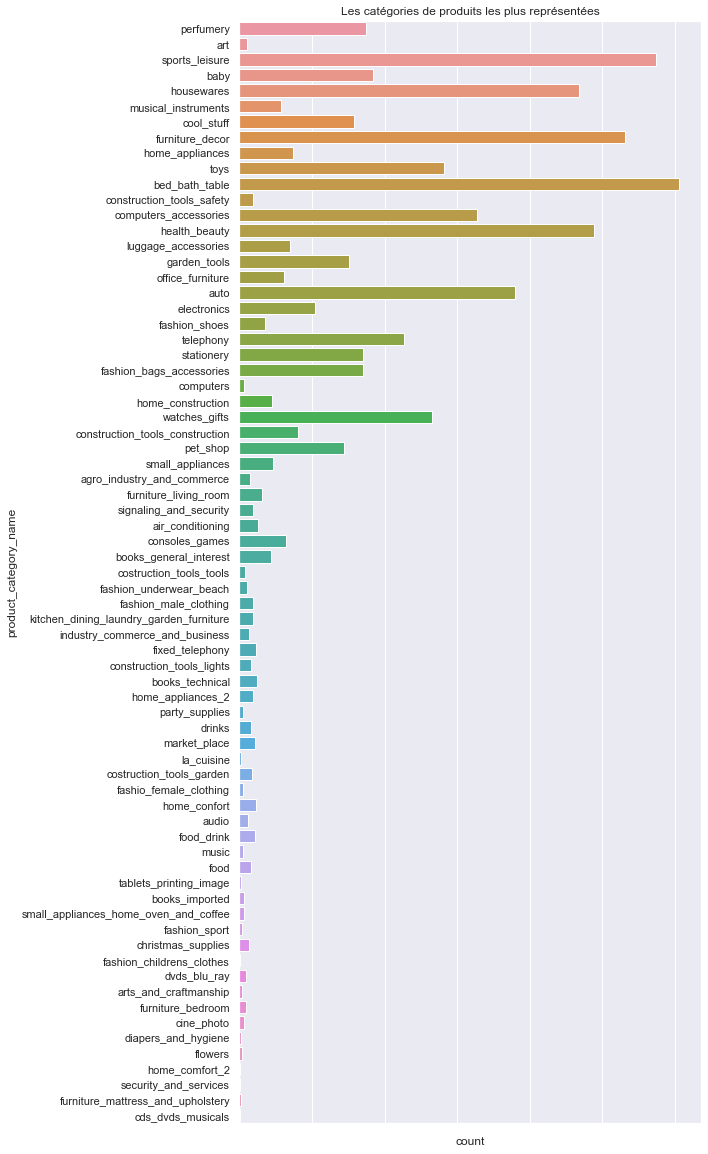

In [56]:
plt.figure(figsize=(10,16))
ax=sns.countplot(data=products, y='product_category_name')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

ax.set_title("Les catégories de produits les plus représentées")

plt.show()

#### <span style='color:green'>Orders et items</span>

Nous allons regrouper les données de lignes de commandes, d'entêtes de commandes et de données clients dans un unique dataframe.

In [57]:
order_items = pd.merge(items, orders,
                       how="left",
                       on="order_id")

del_features_list = ["seller_id", "shipping_limit_date",
                     "order_approved_at",
                     "order_delivered_carrier_date",
                     "order_estimated_delivery_date"]
order_items.drop(del_features_list,
                 axis=1,
                 inplace=True)
order_items.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16


In [58]:
order_items.groupby(by="order_status").sum()["order_item_id"]

order_status
approved            4
canceled          704
delivered      132036
invoiced          435
processing        455
shipped          1294
unavailable         8
Name: order_item_id, dtype: int64

In [59]:
not_delivered = order_items[order_items["order_status"]!="delivered"]["order_status"].value_counts().sum()

print("Total number of orders which are not delivered : ",not_delivered)
print("percentage of orders which are not delivered : ", (not_delivered*100/order_items.shape[0]).round(3),"%")

Total number of orders which are not delivered :  2453
percentage of orders which are not delivered :  2.178 %


Nous n'avons pas besoin des produits qui ne sont pas encore livrés/annulés. De plus, il n'y a que 2,2% de produits qui ne sont pas livrés. 
Donc, nous conserverons uniquement les lignes des produits livrés. 

##### Création de variable "order_delivered" comme Article livré

In [60]:
order_items['order_delivered'] = (order_items["order_status"] == "delivered")

In [61]:
order_items[["order_delivered"]] *= 1

In [62]:
order_items['order_delivered'].value_counts()

1    110197
0      2453
Name: order_delivered, dtype: int64

- Les articles livrés = 1
- Le reste: = 0 

In [63]:
order_items.drop("order_status", axis=1, inplace=True)

In [64]:
order_items.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,1


In [65]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   price                          112650 non-null  float64
 4   freight_value                  112650 non-null  float64
 5   customer_id                    112650 non-null  object 
 6   order_purchase_timestamp       112650 non-null  object 
 7   order_delivered_customer_date  110196 non-null  object 
 8   order_delivered                112650 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 8.2+ MB


Nous allons modifier les types de données en datetime pour les colonnes temporelles.

In [66]:
# Modify object cols in timestamp format
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_cols:
    order_items[col] = order_items[col].astype('datetime64[ns]')
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   price                          112650 non-null  float64       
 4   freight_value                  112650 non-null  float64       
 5   customer_id                    112650 non-null  object        
 6   order_purchase_timestamp       112650 non-null  datetime64[ns]
 7   order_delivered_customer_date  110196 non-null  datetime64[ns]
 8   order_delivered                112650 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(3)
memory usage: 8.2+ MB


In [67]:
#heure du dernier achat
order_items['heure_achat'] = order_items['order_purchase_timestamp'].apply(
        lambda x: x.hour)

In [68]:
#jour de la semaine du dernier achat
order_items['jour_achat'] = order_items['order_purchase_timestamp'].apply(
        lambda x: x.weekday())

In [69]:
order_items['mois_achat'] = order_items['order_purchase_timestamp'].dt.month

In [70]:
order_items[['heure_achat','jour_achat','mois_achat']]

,heure_achat,jour_achat,mois_achat
0,8,2,9
1,10,2,4
2,14,6,1
3,10,2,8
4,13,5,2
...,...,...,...
112645,13,0,4
112646,10,5,7
112647,17,0,10
112648,23,0,8


Nous pouvons également regarder la répartition du nombre de commandes par mois, jour de la semaine ou heure de la journée :

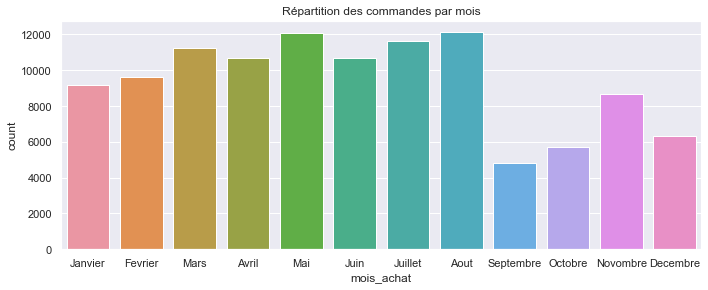

In [71]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data= order_items, x='mois_achat')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
ax.set_title("Répartition des commandes par mois")

plt.xticks(np.arange(0,12), ['Janvier','Fevrier','Mars','Avril','Mai','Juin',
                             'Juillet','Aout','Septembre','Octobre','Novombre','Decembre'], 
           rotation='horizontal')

plt.show()

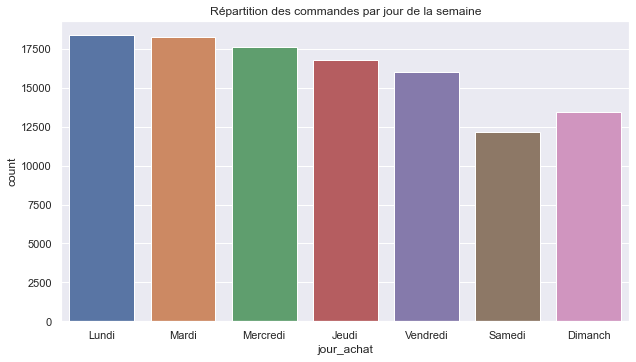

In [72]:
plt.figure(figsize=(9,5))
ax=sns.countplot(data= order_items, x='jour_achat')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
ax.set_title("Répartition des commandes par jour de la semaine")

plt.xticks(np.arange(0,7), ['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi',
                             'Dimanch'], 
           rotation='horizontal')

plt.show()

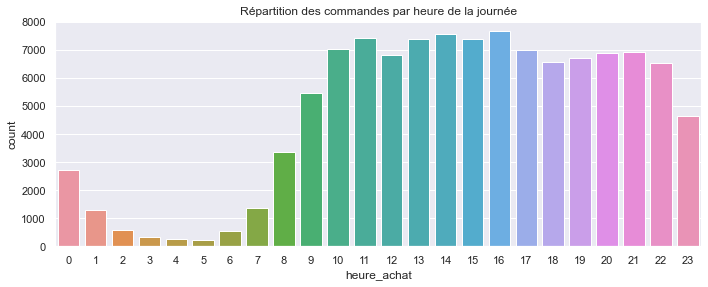

In [73]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data= order_items, x='heure_achat')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
ax.set_title("Répartition des commandes par heure de la journée")
ylabel="Nb orders",
xlabel="Hour",

plt.show()

#### <span style='color:green'>order_items et payments</span>

In [74]:
order_items = pd.merge(order_items, payments,
                       how="left",
                       on="order_id")
order_items.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered,heure_achat,jour_achat,mois_achat,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,8,2,9,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,10,2,4,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,14,6,1,1.0,credit_card,5.0,216.87


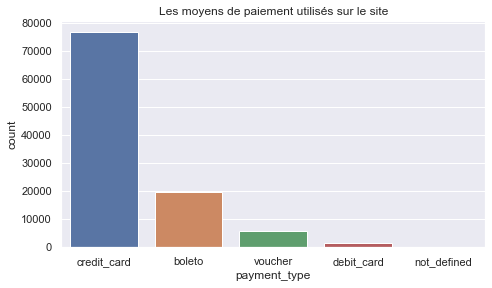

In [75]:
plt.figure(figsize=(7,4))
ax=sns.countplot(data=payments, x='payment_type')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
ax.set_title("Les moyens de paiement utilisés sur le site")

plt.show()

On remarque que 80% des paiements environ sont réalisés en carte bancaire. Nous ne prendrons donc pas en considération cette variable dans nos explorations.

#### <span style='color:green'>order_items et reviews</span>

Pour les avis clients, nous allons également créer une nouvelle variable qui indiquera seulement si oui ou non la commande a été notée (True or False) et une seconde variable qui reprendra la note attribuée.

In [76]:
order_items = pd.merge(order_items, reviews,
                       how="left",
                       on="order_id")


order_items = order_items.drop(['review_id',
              'review_comment_title', 'review_comment_message','review_creation_date','review_answer_timestamp'], axis=1)

order_items.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered,heure_achat,jour_achat,mois_achat,payment_sequential,payment_type,payment_installments,payment_value,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,8,2,9,1.0,credit_card,2.0,72.19,5
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,10,2,4,1.0,credit_card,3.0,259.83,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,14,6,1,1.0,credit_card,5.0,216.87,5


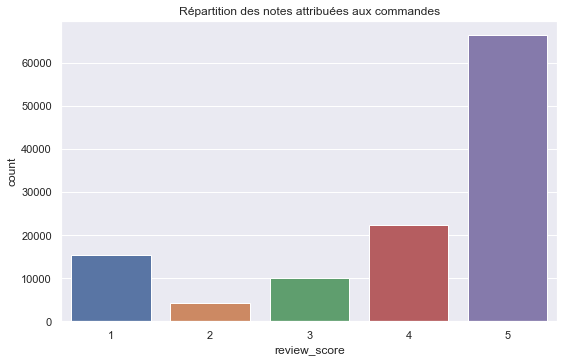

In [77]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=order_items, x='review_score')
ax.set_xticklabels(ax.get_xticklabels())
plt.tight_layout()
ax.set_title("Répartition des notes attribuées aux commandes")

plt.show()

#### <span style='color:green'>order_items et customers</span>

In [78]:
order_items = pd.merge(order_items, customers,
                       how="left",
                       on="customer_id")
order_items.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered,heure_achat,jour_achat,mois_achat,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,8,2,9,1.0,credit_card,2.0,72.19,5,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,10,2,4,1.0,credit_card,3.0,259.83,4,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,14,6,1,1.0,credit_card,5.0,216.87,5,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG


#### <span style='color:green'>order_items et geolocalisation</span>

In [79]:
order_items = pd.merge(order_items,geolocalisation,
                       how="left",
                       on="zip_code_prefix")
order_items.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered,heure_achat,jour_achat,mois_achat,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,8,2,9,1.0,credit_card,2.0,72.19,5,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.758076,-41.312633,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,10,2,4,1.0,credit_card,3.0,259.83,4,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.212393,-50.941471,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,14,6,1,1.0,credit_card,5.0,216.87,5,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.860439,-44.597972,pará de minas,MG


#### <span style='color:green'>order_items et products</span>

et enfin créer le dataset global en réalisant la jointure avec les produits / catégories :

In [80]:
data = pd.merge(order_items, products,
               how="left",
               on="product_id")
data.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered,heure_achat,jour_achat,mois_achat,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,8,2,9,1.0,credit_card,2.0,72.19,5,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.758076,-41.312633,campos dos goytacazes,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,10,2,4,1.0,credit_card,3.0,259.83,4,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.212393,-50.941471,santa fe do sul,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,14,6,1,1.0,credit_card,5.0,216.87,5,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.860439,-44.597972,pará de minas,MG,furniture_decor


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118318 entries, 0 to 118317
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118318 non-null  object        
 1   order_item_id                  118318 non-null  int64         
 2   product_id                     118318 non-null  object        
 3   price                          118318 non-null  float64       
 4   freight_value                  118318 non-null  float64       
 5   customer_id                    118318 non-null  object        
 6   order_purchase_timestamp       118318 non-null  datetime64[ns]
 7   order_delivered_customer_date  115730 non-null  datetime64[ns]
 8   order_delivered                118318 non-null  int32         
 9   heure_achat                    118318 non-null  int64         
 10  jour_achat                     118318 non-null  int64         
 11  

In [82]:
100*(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
price                            0.000000
freight_value                    0.000000
customer_id                      0.000000
order_purchase_timestamp         0.000000
customer_state                   0.000000
order_delivered                  0.000000
heure_achat                      0.000000
jour_achat                       0.000000
mois_achat                       0.000000
customer_city                    0.000000
zip_code_prefix                  0.000000
customer_unique_id               0.000000
review_score                     0.000000
payment_sequential               0.002536
payment_installments             0.002536
payment_type                     0.002536
payment_value                    0.002536
geolocation_state                0.267922
geolocation_lat                  0.267922
geolocation_lng                  0.267922
geolocation_city                 0

#### Les lignes avec "NaN"

In [83]:
sum([True for idx,row in data.iterrows() if any(row.isnull())])

4550

#### <span style='color:blue'>Suppression des lignes contenant des valeurs manquantes</span>

In [84]:
# Suppression des lignes contenant des valeurs manquantes
nb_rows_before_dropping_missing = len(data)
mask = data.isnull().any(axis=1)
data = data[~mask]
print("Number of deleted rows:",
      nb_rows_before_dropping_missing - len(data))
print("Number of remaining rows:", len(data))

Number of deleted rows: 4550
Number of remaining rows: 113768


Nous ne pouvons pas imputer ces valeurs. De plus, ces nombres sont petits, 
nous pouvons donc les supprimer. 

#### <span style='color:blue'>Suppression des lignes dupliquées</span>

In [85]:
nb_rows_before_dropping_duplicates = len(data)
data = data.drop_duplicates()

print("Number of dropped duplicated rows:",
      nb_rows_before_dropping_duplicates - len(data))
print("Number of remaining rows:", len(data))

Number of dropped duplicated rows: 405
Number of remaining rows: 113363


#### <span style='color:blue'>Les valeurs abberantes</span>

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


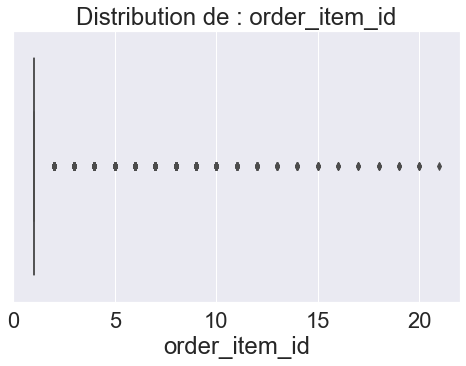

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


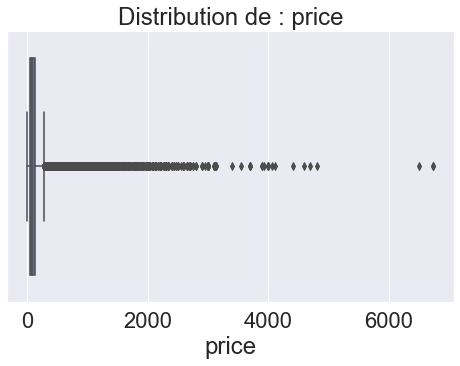

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


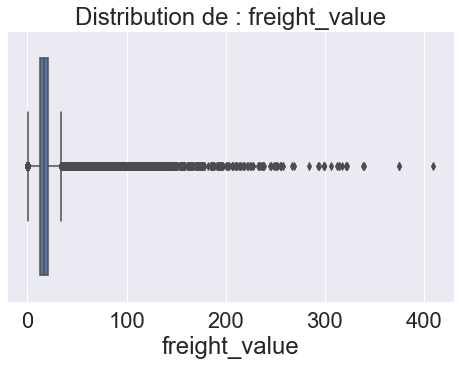

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


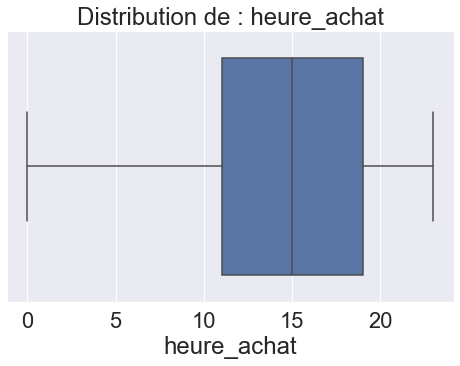

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


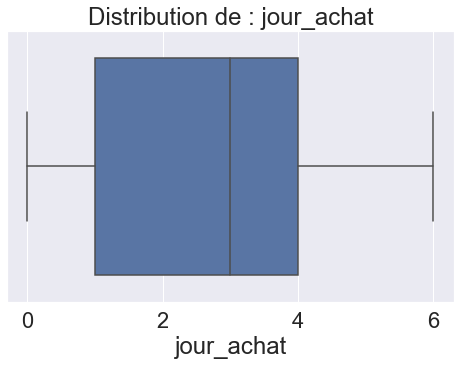

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


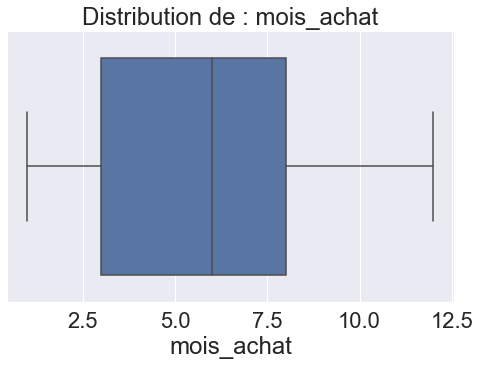

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


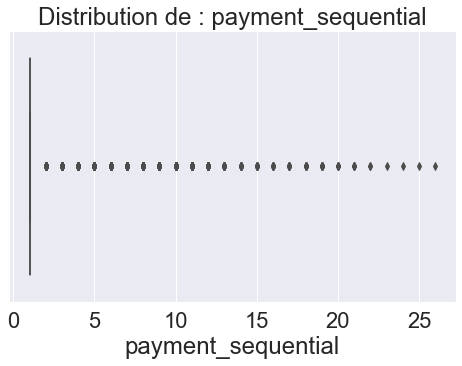

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


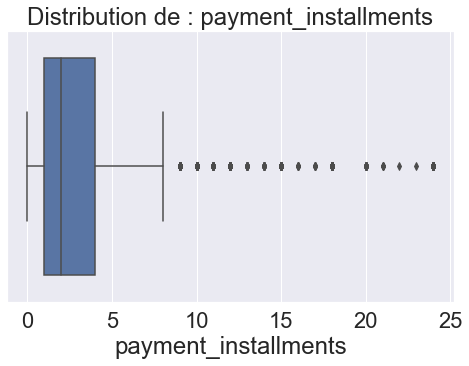

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


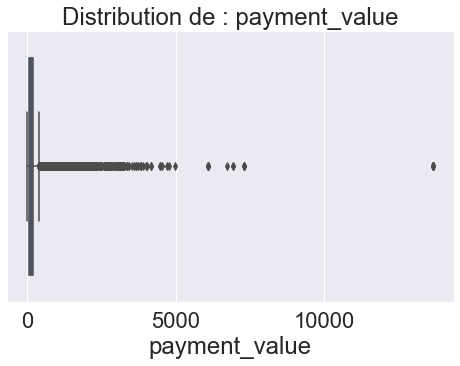

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


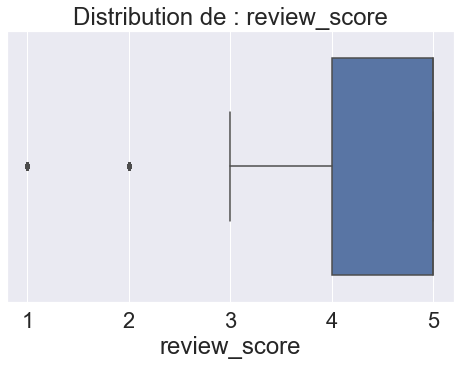

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


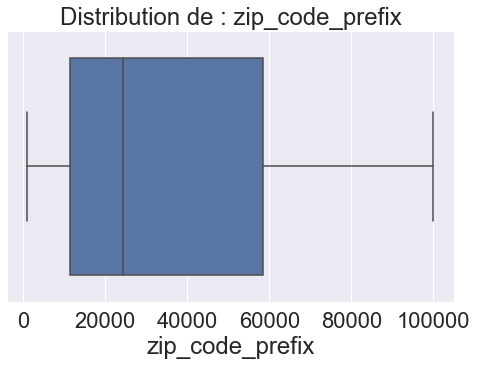

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


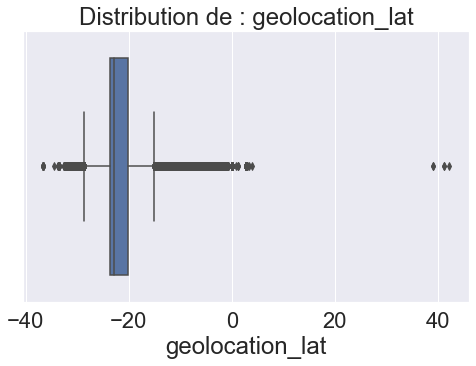

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


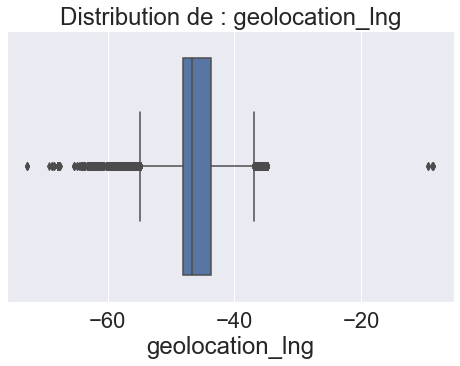

In [86]:
numeric_columns = data.select_dtypes(include = ['float64','int64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (8,5))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

### Isolation forest

In [87]:
from sklearn.ensemble import IsolationForest

In [88]:
feature = data[['payment_installments','payment_sequential','payment_value',
       'geolocation_lat', 'geolocation_lng']]


clf = IsolationForest(random_state= 0).fit(feature)

pd.DataFrame({'ouliers': clf.predict(feature)}, index=feature.index)

data['outliers'] = pd.Series(clf.predict(feature), index=feature.index)

In [89]:
print('Je supprime', len(data.loc[data['outliers'] == -1]), 'outliers')
data = data.drop(data.loc[data['outliers'] == -1].index)
data = data.drop('outliers', axis=1)

Je supprime 15917 outliers


In [90]:
data[data["payment_installments"]==0]

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered,heure_achat,jour_achat,mois_achat,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name
53923,744bade1fcf9ff3f31d860ace076d422,1,0cf573090c66bb30ac5e53c82bdb0403,45.9,12.79,5e5794daaa13f73e2f1cdb4114529843,2018-04-22 11:34:42,2018-04-27 20:55:28,1,11,6,4,2.0,credit_card,0.0,58.69,5,f54cea27c80dc09bfe07b1cf1e01b845,5263,sao paulo,SP,-23.433009,-46.581386,sao paulo,SP,telephony


Il y a une lignes dans les données, avec 0 versement. nous allons la supprimer. 

In [91]:
data.loc[(data["payment_installments"]==0), :].index

Int64Index([53923], dtype='int64')

In [92]:
index_zero= data.loc[(data["payment_installments"]==0), :].index

In [93]:
data.drop(index_zero,0, inplace=True)

In [94]:
data[data["payment_installments"]==0]

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered,heure_achat,jour_achat,mois_achat,payment_sequential,payment_type,payment_installments,payment_value,review_score,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,product_category_name


Les autres variables ne semblent pas avoir les valeurs aberrantes

<AxesSubplot:>

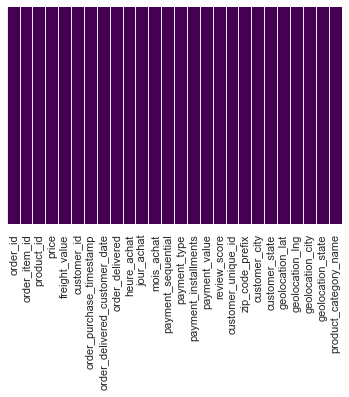

In [95]:
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97445 entries, 0 to 118317
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97445 non-null  object        
 1   order_item_id                  97445 non-null  int64         
 2   product_id                     97445 non-null  object        
 3   price                          97445 non-null  float64       
 4   freight_value                  97445 non-null  float64       
 5   customer_id                    97445 non-null  object        
 6   order_purchase_timestamp       97445 non-null  datetime64[ns]
 7   order_delivered_customer_date  97445 non-null  datetime64[ns]
 8   order_delivered                97445 non-null  int32         
 9   heure_achat                    97445 non-null  int64         
 10  jour_achat                     97445 non-null  int64         
 11  mois_achat    

#### <span style='color:blue'>Feature engineering</span>

#### Regroupement de "product_category_name"

In [97]:
pd.set_option('display.max_rows', 100)

In [98]:
data['product_category_name'].value_counts().sort_values(ascending=False)

bed_bath_table                             10431
health_beauty                               8282
sports_leisure                              7782
furniture_decor                             7499
computers_accessories                       6818
housewares                                  6361
watches_gifts                               4827
telephony                                   3873
garden_tools                                3778
toys                                        3657
auto                                        3596
cool_stuff                                  3239
perfumery                                   3070
baby                                        2652
electronics                                 2539
stationery                                  2254
fashion_bags_accessories                    1841
pet_shop                                    1790
office_furniture                            1274
luggage_accessories                          984
consoles_games      

In [99]:
 product_categories_dict = {
    
     # home
    'home_appliances': 'home',
    'home_appliances_2': 'home',
    'home_comfort_2': 'home',
    'home_confort': 'home',
    'air_conditioning': 'home',
    'housewares': 'home',
    'art': 'home',
    'arts_and_craftmanship': 'home',
    'flowers': 'home',
    'cool_stuff': 'home',
    'la_cuisine': 'home',
    
    # furnitur
    'furniture_bedroom': 'furniture',
    'furniture_decor': 'furniture',
    'furniture_living_room': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'bed_bath_table': 'furniture',
    'kitchen_dining_laundry_garden_furniture': 'furniture',
    
    #Construction
    'construction_tools_construction': 'construction',
    'construction_tools_lights': 'construction',
    'construction_tools_safety': 'construction',
    'costruction_tools_garden': 'construction',
    'costruction_tools_tools': 'construction',
    'garden_tools': 'construction',
    'home_construction': 'construction',
   
    
     #technology & electronics,
    'electronics': 'electronics',
    'audio': 'electronics',
    'tablets_printing_image': 'electronics',
    'telephony': 'electronics',
    'fixed_telephony': 'electronics',
    'small_appliances': 'electronics',
    'small_appliances_home_oven_and_coffee': 'electronics',
    'computers_accessories': 'electronics',
    'computers': 'electronics',
        
     #office
    'office_furniture' : 'office',
    'industry_commerce_and_business' : 'office',
    'stationery' : 'office',
    'agro_industry_and_commerce' : 'office',
    'signaling_and_security' : 'office',
    'security_and_services' : 'office',     
    'market_place': 'office',  
    'office_furniture': 'office',

    # supplies
    'christmas_supplies': 'supplies',
    'stationery': 'supplies',
    'party_supplies': 'supplies',
    'auto': 'supplies',
    'luggage_accessories': 'supplies',
    'watches_gifts': 'supplies',

    # food_drink
    'drinks': 'food_drink',
    'food': 'food_drink',
    'food_drink': 'food_drink',
        
    # health_beauty
    'health_beauty': 'health_beauty',
    'perfumery': 'health_beauty',
    'diapers_and_hygiene': 'health_beauty',
    'baby': 'health_beauty',
  
    # fashion
    'fashio_female_clothing': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_underwear_beach': 'fashion',
  
    #sports_leisure 
    'sports_leisure': 'sports_leisure',
    'consoles_games': 'sports_leisure',
    'musical_instruments': 'sports_leisure',
    'toys': 'sports_leisure',
    'cine_photo': 'sports_leisure',
    'dvds_blu_ray': 'sports_leisure',
    'cds_dvds_musicals': 'sports_leisure',
    'music': 'sports_leisure',
    'books_general_interest': 'sports_leisure',
    'books_imported': 'sports_leisure',
    'books_technical': 'sports_leisure',
    'pet_shop': 'sports_leisure',    
     }

#Remplacement de « product_category_name » par « product_main_category »
data['product_main_category'] = \
    data['product_category_name']\
    .replace(product_categories_dict)

In [100]:
data['product_main_category'].value_counts().sort_values(ascending=False)

furniture         18729
sports_leisure    15659
electronics       14429
health_beauty     14039
supplies          11835
home              11407
construction       5768
fashion            2397
office             2104
food_drink         1078
Name: product_main_category, dtype: int64

In [101]:
# drop product_category_name column
data.drop("product_category_name", axis=1, inplace=True)

<AxesSubplot:title={'center':'Répartition des catégories principales de produit, achetées par les clients'}, ylabel='product_main_category'>

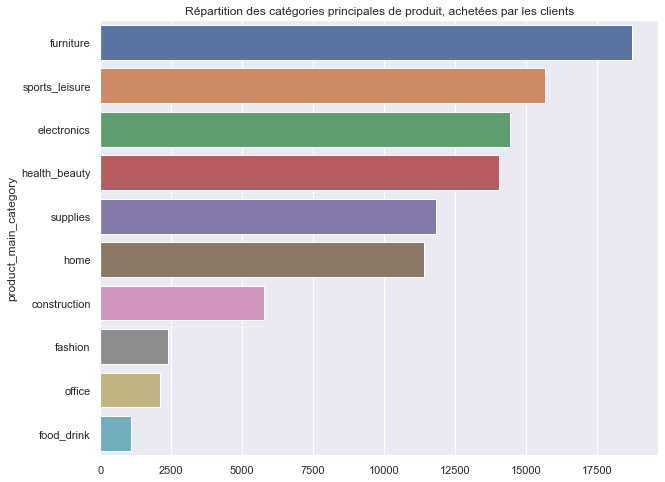

In [102]:
categories = data.groupby(['product_main_category']).count()[
    'customer_city'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title('Répartition des catégories principales de produit, achetées par les clients')
sns.barplot(x = categories.values,
           y = categories.index)

#### Suppression de 'geolocation_state' et 'geolocation_city'

Les informations dans les deux variables de "geolocation_state","customer_state" et puis celles de "customer_city", et "geolocation_city" sont identiques. Nous conservons celles de customer qui sont en anglais. 

In [103]:
data[['geolocation_state','customer_state','customer_city','geolocation_city']]

,geolocation_state,customer_state,customer_city,geolocation_city
0,RJ,RJ,campos dos goytacazes,campos dos goytacazes
1,SP,SP,santa fe do sul,santa fe do sul
2,MG,MG,para de minas,pará de minas
3,SP,SP,atibaia,atibaia
4,SP,SP,varzea paulista,varzea paulista
...,...,...,...,...
118312,MG,MG,montes claros,montes claros
118314,PR,PR,curitiba,curitiba
118315,SP,SP,sao paulo,sao paulo
118316,SP,SP,vinhedo,vinhedo


In [104]:
data[data["geolocation_city"]!=data["customer_city"]][["geolocation_city","customer_city"]]

,geolocation_city,customer_city
2,pará de minas,para de minas
96,mogi guaçu,mogi-guacu
121,águas lindas de goiás,aguas lindas de goias
152,bagé,bage
154,são josé do rio pardo,sao jose do rio pardo
...,...,...
118245,brasília,brasilia
118282,são paulo,sao paulo
118291,são paulo,sao paulo
118299,são bernardo do campo,sao bernardo do campo


In [105]:
data.drop(["geolocation_city","geolocation_state"],axis=1,inplace=True)

#### Création de variable de 'paid_credit_card'

In [106]:
data['paid_credit_card'] = (data["payment_type"] == "credit_card")

In [107]:
data[["paid_credit_card"]] *= 1

In [108]:
data.drop("payment_type",  axis=1, inplace=True) 

In [109]:
data['paid_credit_card'].value_counts()

1    72256
0    25189
Name: paid_credit_card, dtype: int64

#### Récence (R)-  nombre de jours écoulés depuis le dernier achat

In [110]:
    #nombre de jours écoulés depuis le dernier achat
    data['Recency'] = data['order_purchase_timestamp'].max() -  data[
        'order_purchase_timestamp']
    data['Recency'] = data['Recency'].apply(lambda x: x.days)

In [111]:
data.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered,heure_achat,jour_achat,mois_achat,payment_sequential,payment_installments,payment_value,review_score,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,product_main_category,paid_credit_card,Recency
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,8,2,9,1.0,2.0,72.19,5,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.758076,-41.312633,home,1,350
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,10,2,4,1.0,3.0,259.83,4,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.212393,-50.941471,sports_leisure,1,490
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,14,6,1,1.0,5.0,216.87,5,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.860439,-44.597972,furniture,1,227


#### Création des variables de "first_order" et "last_order"

In [116]:
first_last_order= data.groupby("customer_unique_id").agg(
    first_order=pd.NamedAgg(column="order_purchase_timestamp", aggfunc="min"),
    last_order=pd.NamedAgg(column="order_purchase_timestamp", aggfunc="max"))
first_last_order.head(2)

,first_order,last_order
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27


In [117]:
data = pd.merge(data, first_last_order,
                       how="left",
                       on="customer_unique_id")

In [118]:
data.head(2)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered,heure_achat,jour_achat,mois_achat,payment_sequential,payment_installments,payment_value,review_score,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,product_main_category,paid_credit_card,Recency,first_order,last_order
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,8,2,9,1.0,2.0,72.19,5,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.758076,-41.312633,home,1,350,2017-09-13 08:59:02,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,10,2,4,1.0,3.0,259.83,4,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.212393,-50.941471,sports_leisure,1,490,2017-04-26 10:53:06,2017-09-18 16:12:04


#### Fréquence (F)

Nous allons maintenant déterminer la fréquence (F) à laquelle les clients achètent les produits. 

In [119]:
df_frequency= data.groupby("customer_unique_id")["order_id"].nunique()
df_frequency.reset_index()
df_frequency.columns =["customer_unique_id","Frequency"]
df_frequency.head()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0004aac84e0df4da2b147fca70cf8255    1
0004bd2a26a76fe21f786e4fbd80607f    1
Name: order_id, dtype: int64

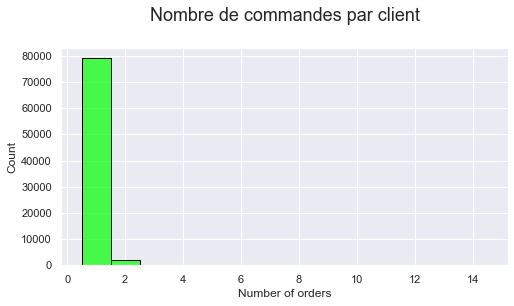

In [120]:
fig = plt.figure(figsize=(8, 4))
sns.histplot(data.groupby("customer_unique_id").agg({"order_id": "nunique"}),
             x="order_id",
             discrete=True,
             edgecolor="black",
             color="lime", alpha=0.7)
plt.xlabel("Number of orders")
plt.title(f"Nombre de commandes par client\n", fontsize=18)
plt.show()

La majeure partie des clients n'ont passé qu'une seule commande. Il sera donc compliqué d'établir un classement de leur catégorie produit préférée. Nous allons donc créer une variable par catégorie de produit, et nous calculerons ensuite, le ratio du nombre de produits par catégorie sur le nombre de produits total acheté par le client.

In [121]:
categories_customers = data.groupby(["customer_unique_id", "product_main_category"])\
                        .agg({"order_item_id": "count"}).unstack()
categories_customers.columns = categories_customers.columns.droplevel(0)
categories_customers.fillna(0, inplace=True)
categories_customers["total_items"] = categories_customers.sum(axis=1)

# ratio of total items
for col in categories_customers.columns:
    if (col != "total_items"):
        categories_customers[col] = (categories_customers[col]/categories_customers["total_items"])

categories_customers.reset_index(inplace=True)
categories_customers.head(3)

product_main_category,customer_unique_id,construction,electronics,fashion,food_drink,furniture,health_beauty,home,office,sports_leisure,supplies,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [122]:
categories_customers['total_items'].describe()

count    81458.000000
mean         1.196261
std          0.612783
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: total_items, dtype: float64

Nous allons ensuite calculer le nombre moyen d'articles par commande pour chaque client :

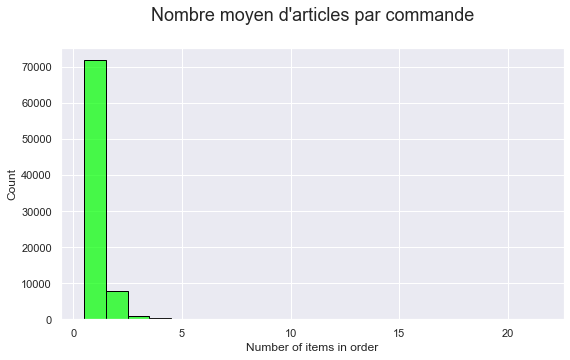

In [123]:
products_per_order = data.groupby(["customer_unique_id", "order_id"])\
                        .agg({"order_item_id": "count"})
products_per_order = products_per_order.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})

# Plot density of number items in order
fig = plt.figure(figsize=(9, 5))
sns.histplot(data = products_per_order,
             x="order_item_id",
             discrete=True,
             edgecolor="black",
             color="lime", alpha=0.7)
plt.xlabel("Number of items in order")
plt.title(f"Nombre moyen d'articles par commande\n", fontsize=18)
plt.show()

In [124]:
products_per_order.describe()

,order_item_id
count,81458.000000
mean,1.155011
std,0.515909
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


In [125]:
# Merge with other calculated features
data = pd.merge(data, categories_customers,
                how="left",
                on="customer_unique_id")

In [126]:
data.head()

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered,heure_achat,jour_achat,mois_achat,payment_sequential,payment_installments,payment_value,review_score,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,product_main_category,paid_credit_card,Recency,first_order,last_order,construction,electronics,fashion,food_drink,furniture,health_beauty,home,office,sports_leisure,supplies,total_items
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,8,2,9,1.0,2.0,72.19,5,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,-21.758076,-41.312633,home,1,350,2017-09-13 08:59:02,2017-09-13 08:59:02,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,10,2,4,1.0,3.0,259.83,4,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.212393,-50.941471,sports_leisure,1,490,2017-04-26 10:53:06,2017-09-18 16:12:04,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,2.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,14,6,1,1.0,5.0,216.87,5,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.860439,-44.597972,furniture,1,227,2018-01-14 14:33:31,2018-01-14 14:33:31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,1,10,2,8,1.0,2.0,25.78,4,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.144923,-46.539830,health_beauty,1,21,2018-08-08 10:00:35,2018-08-08 10:00:35,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,1,13,5,2,1.0,3.0,218.04,5,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.249008,-46.824961,construction,1,571,2017-02-04 13:57:51,2017-02-04 13:57:51,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [127]:
data[['total_items','order_item_id']].describe()

,total_items,order_item_id
count,97445.000000,97445.000000
mean,1.510154,1.171317
std,1.190986,0.597396
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,1.000000
max,21.000000,21.000000


In [128]:
data.drop("order_item_id", axis= 1, inplace = True)

In [129]:
data['total_price'] = data['price'] + data['freight_value']

In [130]:
data.drop(["price","payment_value","freight_value"], axis=1, inplace=True)

### Les différents états du client :

#### Les 10 villes avec le plus de clients

Ici, nous allons regader d'où viennent les clients et si cette localisation a un impact sur les ventes.

<AxesSubplot:title={'center':'Les 10 villes avec le plus de clients'}, ylabel='customer_city'>

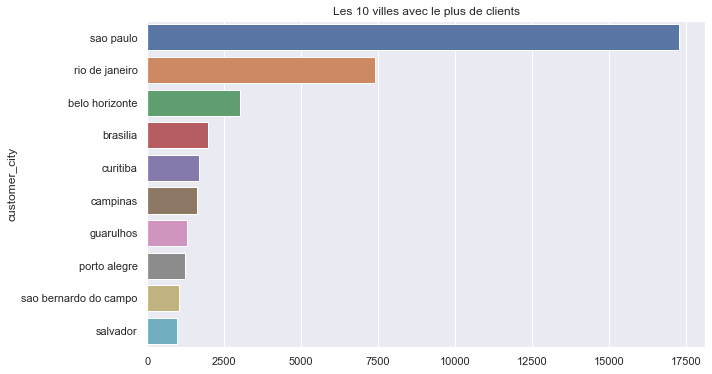

In [131]:
cities = data.groupby(['customer_city']).count()[
    'customer_state'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 villes avec le plus de clients')
sns.barplot(x = cities.values,
           y = cities.index)

##### Les 10 états avec le plus de clients

<AxesSubplot:title={'center':'Les 10 états avec le plus de clients'}, ylabel='customer_state'>

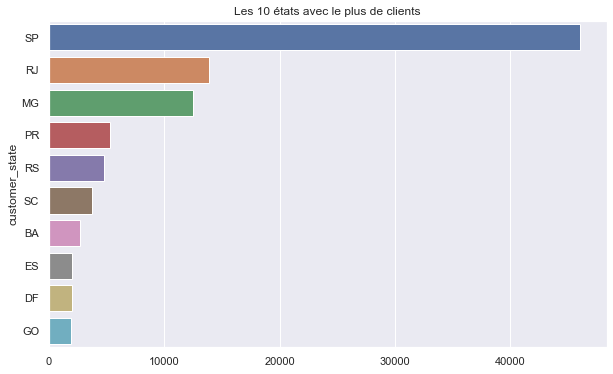

In [132]:
state = data.groupby(['customer_state']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 états avec le plus de clients')
sns.barplot(x = state.values,
           y = state.index)

Les codes états ne sont pas très parlant. Nous allons donc utiliser Wikipedia pour modifier les codes états par leur nom :

In [133]:
wiki_url = "https://en.wikipedia.org/wiki/Federative_units_of_Brazil"
states_table = pd.read_html(wiki_url)[1].set_index("Code")
states_table.head(3)

,Flag and name,Capital,Largest city,Area(km2)[1],Population(2019)[2],"Density (perkm2, 2019)","GDP (R$millions, 2016)[3]",HDI(2017)[4]
Code,,,,,,,,
AC,Acre,Rio Branco,Rio Branco,164124,881935,5.37,13751,0.719
AL,Alagoas,Maceió,Maceió,27843,3337357,119.86,49456,0.683
AP,Amapá,Macapá,Macapá,142471,845731,5.94,14339,0.740


In [134]:
data = pd.merge(data.reset_index(), states_table[["Flag and name"]],
                how="left",
                left_on="customer_state",
                right_on="Code")
data.drop("customer_state", axis=1, inplace=True)
data = data.rename(columns={"Flag and name": "customer_state"})

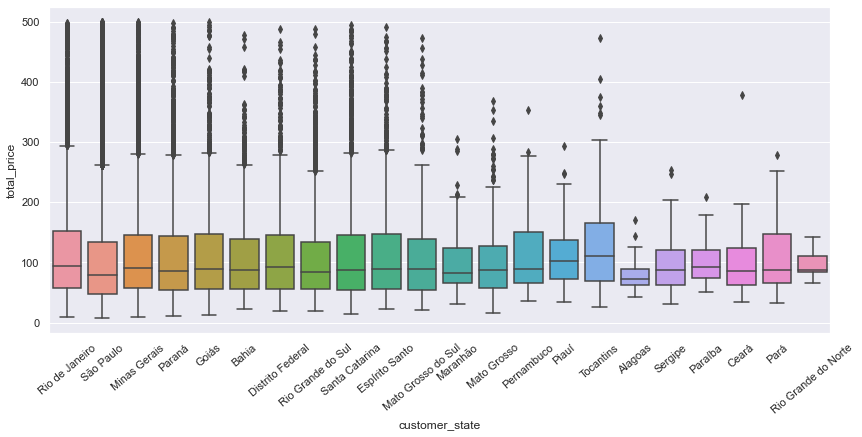

In [135]:
# Boxplots of total spend by state
fig = plt.figure(figsize=(14,6))
sns.boxplot(x="customer_state", y="total_price", 
            data=data[data["total_price"]<500])
plt.xticks(rotation=40)
plt.show()

On voit dans ces boxplots que l'état du client a un impact faible sur les variances et médianes des dépenses sur le site.

Afin d'utiliser une variable de localisation encodable sans impact négatif sur nos modélisation, nous allons calculer la distance Haversine entre l'état du client (moyenne des latitudes et longitudes de l'état) et le siège de Olist :

In [136]:
state_location = geolocalisation.groupby("geolocation_state").mean()
state_location = pd.merge(states_table[["Flag and name"]].reset_index(), 
                          state_location, 
                          right_on="geolocation_state", 
                          left_on="Code", 
                          how="left")
state_location = state_location[["Flag and name", "geolocation_lat", "geolocation_lng"]]

# Olist location
olist_lat = -25.43045
olist_lon = -49.29207

In [137]:
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [138]:
# Haversine distance between centre state and Olist office
state_location['harvesine_distance'] = [haversine_distance(olist_lat, olist_lon, x, y) 
                              for x, y in zip(state_location.geolocation_lat, 
                                              state_location.geolocation_lng)]

In [139]:
data = pd.merge(data, state_location[["Flag and name", "harvesine_distance"]],
         how="left",
         left_on="customer_state",
         right_on="Flag and name")
data.drop("index", axis=1, inplace=True)
data.head(3)

,order_id,product_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_delivered,heure_achat,jour_achat,mois_achat,payment_sequential,payment_installments,review_score,customer_unique_id,zip_code_prefix,customer_city,geolocation_lat,geolocation_lng,product_main_category,paid_credit_card,Recency,first_order,last_order,construction,electronics,fashion,food_drink,furniture,health_beauty,home,office,sports_leisure,supplies,total_items,total_price,customer_state,Flag and name,harvesine_distance
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,8,2,9,1.0,2.0,5,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,-21.758076,-41.312633,home,1,350,2017-09-13 08:59:02,2017-09-13 08:59:02,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72.19,Rio de Janeiro,Rio de Janeiro,430.600094
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,10,2,4,1.0,3.0,4,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,-20.212393,-50.941471,sports_leisure,1,490,2017-04-26 10:53:06,2017-09-18 16:12:04,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,2.0,259.83,São Paulo,São Paulo,209.024370
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,14,6,1,1.0,5.0,5,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,-19.860439,-44.597972,furniture,1,227,2018-01-14 14:33:31,2018-01-14 14:33:31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,216.87,Minas Gerais,Minas Gerais,505.191218


In [140]:
data.drop(["geolocation_lat","geolocation_lng","Flag and name"], axis =1, inplace = True)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97445 entries, 0 to 97444
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97445 non-null  object        
 1   product_id                     97445 non-null  object        
 2   customer_id                    97445 non-null  object        
 3   order_purchase_timestamp       97445 non-null  datetime64[ns]
 4   order_delivered_customer_date  97445 non-null  datetime64[ns]
 5   order_delivered                97445 non-null  int32         
 6   heure_achat                    97445 non-null  int64         
 7   jour_achat                     97445 non-null  int64         
 8   mois_achat                     97445 non-null  int64         
 9   payment_sequential             97445 non-null  float64       
 10  payment_installments           97445 non-null  float64       
 11  review_score   

#### <span style='color:blue'>Corrélation entre les variables</span>

Nous allons à présent regarder s'il existe des corrélations linéaires fortes dans le jeu de données :

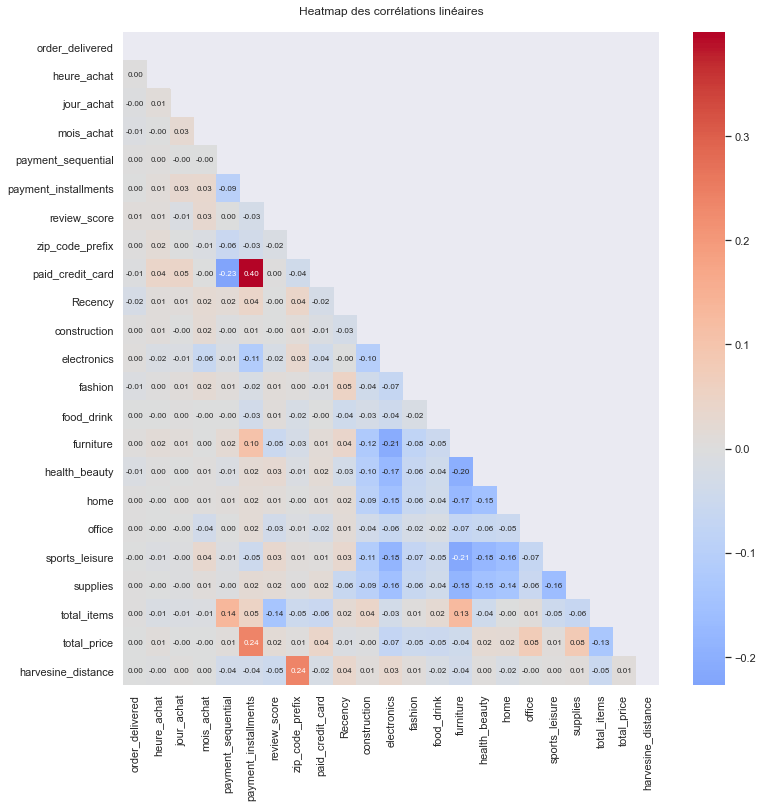

In [143]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

#### Identification des variables corrélées :

In [145]:
data.corr()[["paid_credit_card","total_items","Recency","total_price","payment_sequential","payment_installments","zip_code_prefix"]]

,paid_credit_card,total_items,Recency,total_price,payment_sequential,payment_installments,zip_code_prefix
order_delivered,-0.005004,0.001597,-0.021183,0.000550,0.001249,0.000714,0.001095
heure_achat,0.044276,-0.011717,0.009073,0.008091,0.004177,0.012770,0.016770
jour_achat,0.046575,-0.010185,0.008732,-0.002452,-0.000075,0.029938,0.000028
mois_achat,-0.000310,-0.008503,0.024779,-0.002302,-0.003031,0.030823,-0.008894
payment_sequential,-0.226337,0.135706,0.017657,0.007958,1.000000,-0.094392,-0.056043
payment_installments,0.399486,0.051314,0.042607,0.236736,-0.094392,1.000000,-0.034905
review_score,0.002045,-0.136743,-0.002924,0.017215,0.000039,-0.030015,-0.015163
zip_code_prefix,-0.039125,-0.049877,0.040716,0.005543,-0.056043,-0.034905,1.000000
paid_credit_card,1.000000,-0.056401,-0.023851,0.043851,-0.226337,0.399486,-0.039125
Recency,-0.023851,0.018891,1.000000,-0.009043,0.017657,0.042607,0.040716


Nous allons supprimer les variables corrélées

In [146]:
data.drop(["payment_installments","payment_sequential","zip_code_prefix"], axis =1, inplace = True)

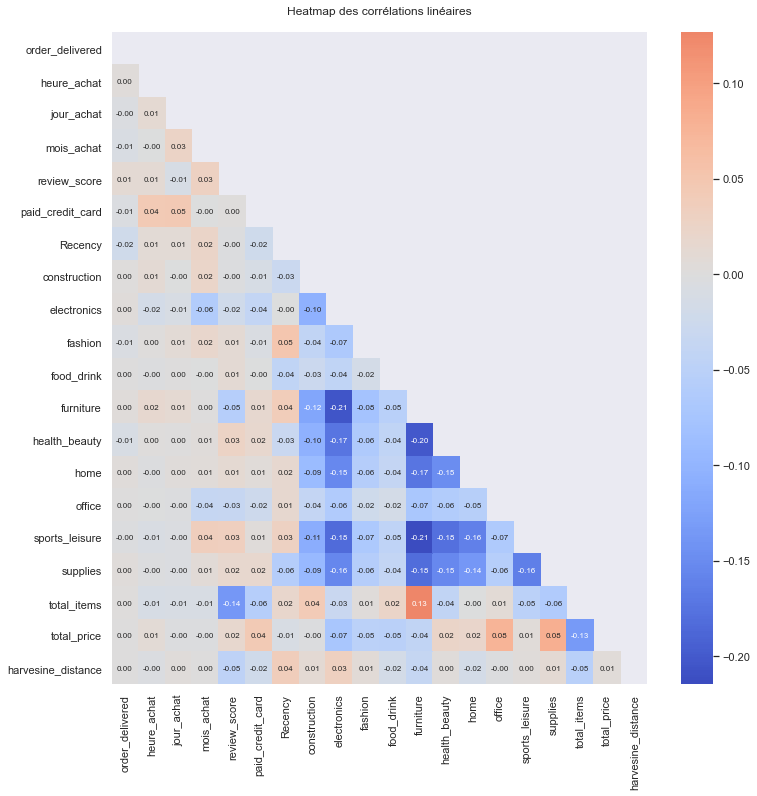

In [147]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

hfdghdfh

In [152]:
data.to_csv('df.csv', index=False)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97445 entries, 0 to 97444
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97445 non-null  object        
 1   product_id                     97445 non-null  object        
 2   customer_id                    97445 non-null  object        
 3   order_purchase_timestamp       97445 non-null  datetime64[ns]
 4   order_delivered_customer_date  97445 non-null  datetime64[ns]
 5   order_delivered                97445 non-null  int32         
 6   heure_achat                    97445 non-null  int64         
 7   jour_achat                     97445 non-null  int64         
 8   mois_achat                     97445 non-null  int64         
 9   review_score                   97445 non-null  int64         
 10  customer_unique_id             97445 non-null  object        
 11  customer_city  

In [149]:
data_RFM = data[['Recency','total_items','total_price','customer_unique_id']]

In [150]:
data_RFM.head()

,Recency,total_items,total_price,customer_unique_id
0,350,1.0,72.19,871766c5855e863f6eccc05f988b23cb
1,490,2.0,259.83,eb28e67c4c0b83846050ddfb8a35d051
2,227,1.0,216.87,3818d81c6709e39d06b2738a8d3a2474
3,21,1.0,25.78,af861d436cfc08b2c2ddefd0ba074622
4,571,1.0,218.04,64b576fb70d441e8f1b2d7d446e483c5


In [151]:
data_RFM.to_csv('data_RFM.csv', index=False)

In [ ]:
data_5 = data[['review_score','Recency','total_items', 'total_price','harvesine_distance']]

In [ ]:
data_5.to_csv('data_5.csv', index=False)